In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
data = pd.read_csv('res_dagestan.csv')
data

,territory,ec_number,participants_number,given_bulletins_number,returned_bulletins_number,invalid_bulletins_number,turnout,yes_votes_total,yes_votes_percentage,no_votes_total,no_votes_percentage
0,Агульская,1,99,76,76,0,76.767677,59,77.63,17,22.37
1,Агульская,2,130,125,125,0,96.153846,122,97.6,3,2.4
2,Агульская,3,152,121,121,0,79.605263,113,93.39,8,6.61
3,Агульская,4,457,367,367,2,80.306346,354,96.46,11,2.99
4,Агульская,5,241,231,231,1,95.850622,216,93.51,14,6.06
...,...,...,...,...,...,...,...,...,...,...,...
1910,Шамильская,1908,116,107,107,0,92.241379,92,85.98,15,14.02
1911,Южно-Сухокумская городская,1909,2156,1645,1645,0,76.298701,1464,88.99,181,11
1912,Южно-Сухокумская городская,1910,2019,1492,1492,7,73.897969,1262,84.58,223,14.95
1913,Южно-Сухокумская городская,1911,1737,1261,1261,0,72.596431,1097,86.99,164,13.01


In [16]:
data['yes_votes_percentage'] = data['yes_votes_percentage'].replace(",", ".")
data['no_votes_percentage'] = data['no_votes_percentage'].replace(",", ".")
data['turnout'] = data['turnout'].replace(",", ".")
data['yes_votes_percentage'] = data['yes_votes_percentage'].astype(float)
data['yes_votes_percentage'] = data['yes_votes_percentage'].div(100)
data['no_votes_percentage'] = data['no_votes_percentage'].astype(float)
data['no_votes_percentage'] = data['no_votes_percentage'].div(100)
data['turnout'] = data['turnout'].astype(float)
data['turnout'] = data['turnout'].div(100)
data[['yes_votes_percentage', 'turnout']]
# data.loc[:, 'yes_votes_percentage':'turnout']

,yes_votes_percentage,turnout
0,0.7763,0.767677
1,0.9760,0.961538
2,0.9339,0.796053
3,0.9646,0.803063
4,0.9351,0.958506
...,...,...
1910,0.8598,0.922414
1911,0.8899,0.762987
1912,0.8458,0.738980
1913,0.8699,0.725964


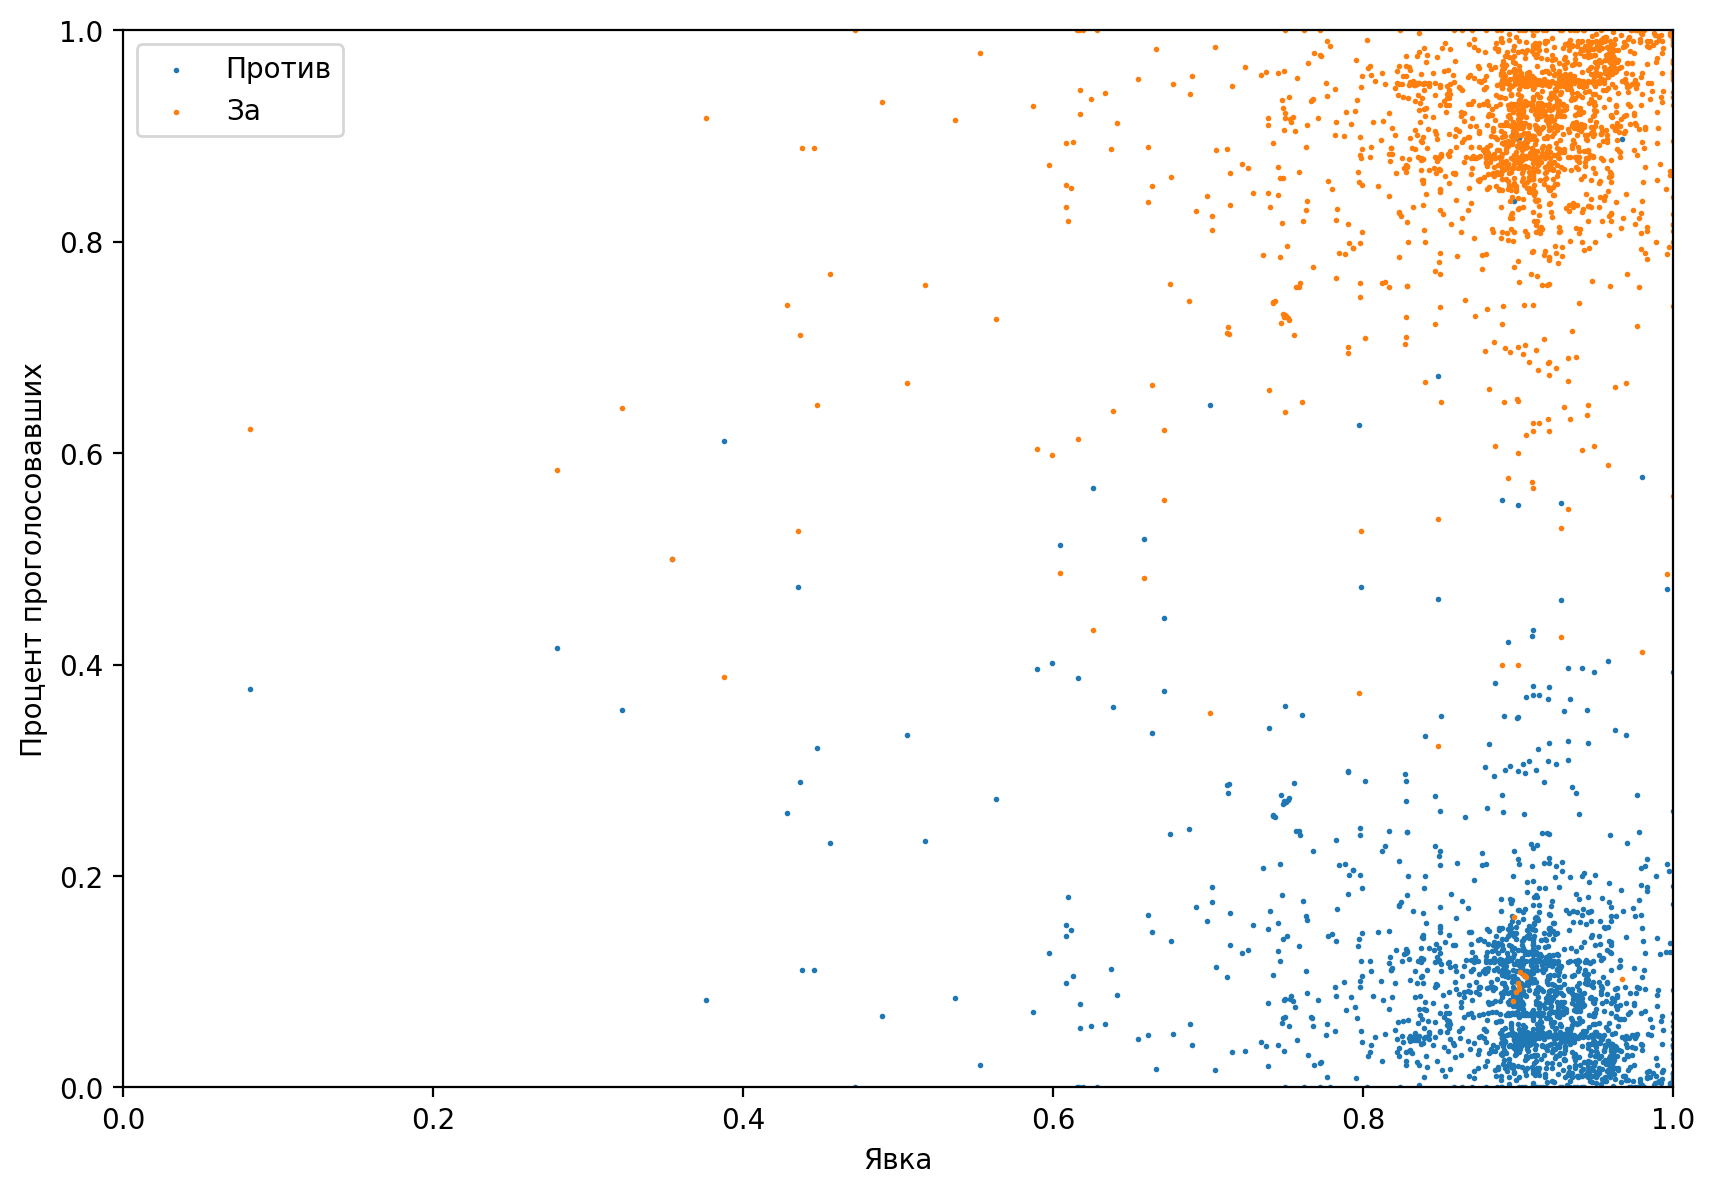

In [18]:
# new_data = data.loc[data['territory'] == 'Томск, Ленинская']
# new_data = data.loc[data['territory'] == 'Томск, Кировская']
# new_data = data.loc[data['territory'] == 'Томск, Советская']
# new_data = data.loc[data['territory'] == 'Томск, Октябрьская']
new_data = data
figure(num=None, figsize=(10, 7), dpi=200, facecolor='w', edgecolor='k')
plt.scatter(new_data['turnout'], new_data['no_votes_percentage'], s=1, label="Против")
plt.scatter(new_data['turnout'], new_data['yes_votes_percentage'], s=1, label="За")
plt.xlabel('Явка')
plt.ylabel('Процент проголосовавших')
plt.legend(loc='upper left')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [ ]:
data.sort_values(by=['no_votes_percentage'], ascending=False)

In [ ]:
new_data = data
figure(num=None, figsize=(10, 7), dpi=200, facecolor='w', edgecolor='k')
for i in data['territory'].unique():
    new_data = data.loc[data['territory'] == i]
    plt.scatter(new_data['turnout'], new_data['yes_votes_percentage'], s=1, label=i)
plt.xlabel('Явка')
plt.ylabel('Процент проголосовавших за')
plt.legend(loc='upper left')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.show()

In [8]:
# t = data.loc[data['yes_votes_percentage'] == '95,83']
data.drop(data[data['yes_votes_percentage'].str.contains(",") == 1].index, inplace=True)

In [6]:
data['yes_votes_percentage'].str.contains(",") == 1

0       False
1       False
2       False
3       False
4       False
        ...  
1910    False
1911    False
1912    False
1913    False
1914    False
Name: yes_votes_percentage, Length: 1915, dtype: bool

In [15]:
data.loc[data['turnout'].str.contains(",")]

AttributeError: Can only use .str accessor with string values!